In [1]:
import pandas as pd
from sqlalchemy import create_engine
from config import dbConnectionString
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
engine = create_engine(dbConnectionString)

In [3]:
#import dataframe from SQL database
df = pd.read_sql_query('select * from "cardioData"',con=engine)
df = df.drop(columns = ['index', 'id'])
df

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [4]:
#check target
df['cardiovascular'].value_counts()

False    33931
True     29985
Name: cardiovascular, dtype: int64

In [5]:
le = LabelEncoder()
df2 = df.copy()
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [6]:
#female = 0, male = 1
df2['gender'] = le.fit_transform(df2['gender'])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,1,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,1,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,1,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,1,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,1,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,0,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,1,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [7]:
normal_dic = {
    "normal" : 0,
    "above normal" : 1,
    "well above normal" : 2,
}

true_false_dic = {
    True : 1,
    False : 0,
}

In [8]:
df2['cardiovascular'] = df2['cardiovascular'].apply(lambda x : true_false_dic[x])
df2['smoke'] = df2['smoke'].apply(lambda x : true_false_dic[x])
df2['alchohol'] = df2['alchohol'].apply(lambda x : true_false_dic[x])
df2['active'] = df2['active'].apply(lambda x : true_false_dic[x])

df2['cholestrol'] = df2['cholestrol'].apply(lambda x : normal_dic[x])
df2['gloucose'] = df2['gloucose'].apply(lambda x : normal_dic[x])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,0,23,110,80,0,0,0,0,1
1,55.4,1,156.0,85.0,1,46,140,90,2,0,0,0,1
2,51.7,1,165.0,64.0,1,25,130,70,2,0,0,0,0
3,47.9,1,156.0,56.0,0,20,100,60,0,0,0,0,0
4,60.0,1,151.0,67.0,0,30,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,34,120,80,0,0,1,0,1
63912,61.9,1,158.0,126.0,1,100,140,90,1,1,0,0,1
63913,52.2,0,183.0,105.0,1,60,180,90,2,0,0,1,0
63914,61.5,1,163.0,72.0,1,32,135,80,0,2,0,0,0


In [9]:
# set X and y values
X = df2.drop(['cardiovascular'], 1).values
y = df2['cardiovascular']

In [10]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)
classifier

LogisticRegression(random_state=9)

In [80]:
# train model using data

classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=9)

In [81]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7170244278949455
Testing Data Score: 0.7248263345641154


In [82]:
# predictions

predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0
...,...,...
61468,0,1
3115,1,1
14706,0,0
32159,0,0


In [83]:
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df.head()

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0


In [84]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[6726, 1757],
       [2640, 4856]])

In [85]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7248263345641154


In [86]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8483
           1       0.73      0.65      0.69      7496

    accuracy                           0.72     15979
   macro avg       0.73      0.72      0.72     15979
weighted avg       0.73      0.72      0.72     15979



In [46]:
df2['age'] = df2['age'].astype(float)

In [48]:
df3 = df2.drop(columns = ['BMI'])

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
corr = df3.corr()

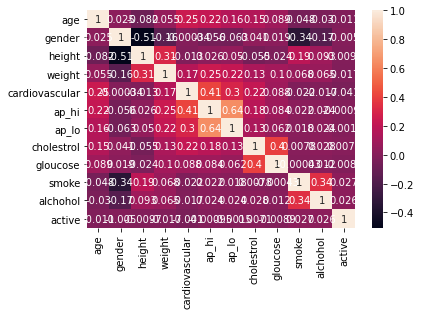

In [53]:
sn.heatmap(df3.corr(), annot = True)
plt.show()

In [54]:
mask = np.triu(np.ones_like(corr, dtype=bool))

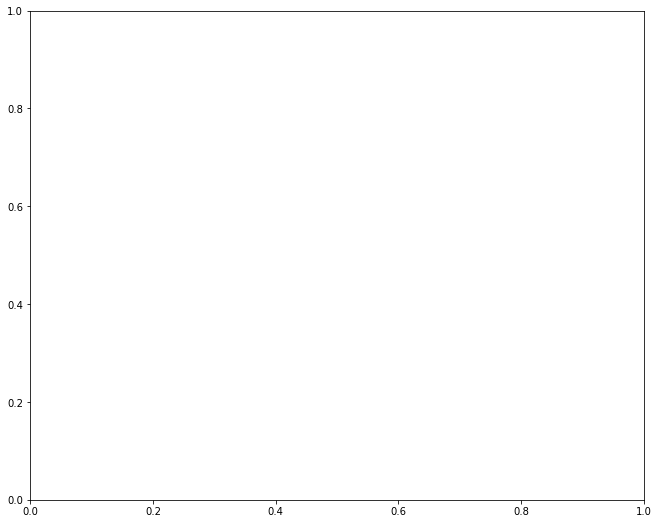

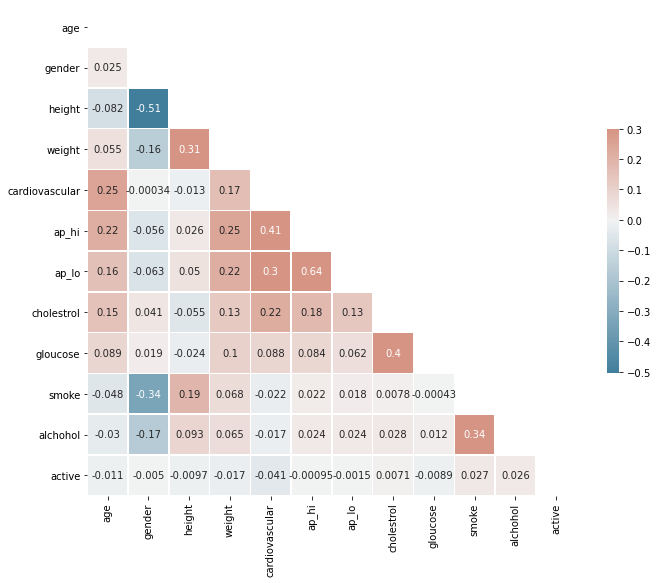

In [62]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sn.diverging_palette(230, 20, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()